In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

Number of indices to keep: 11


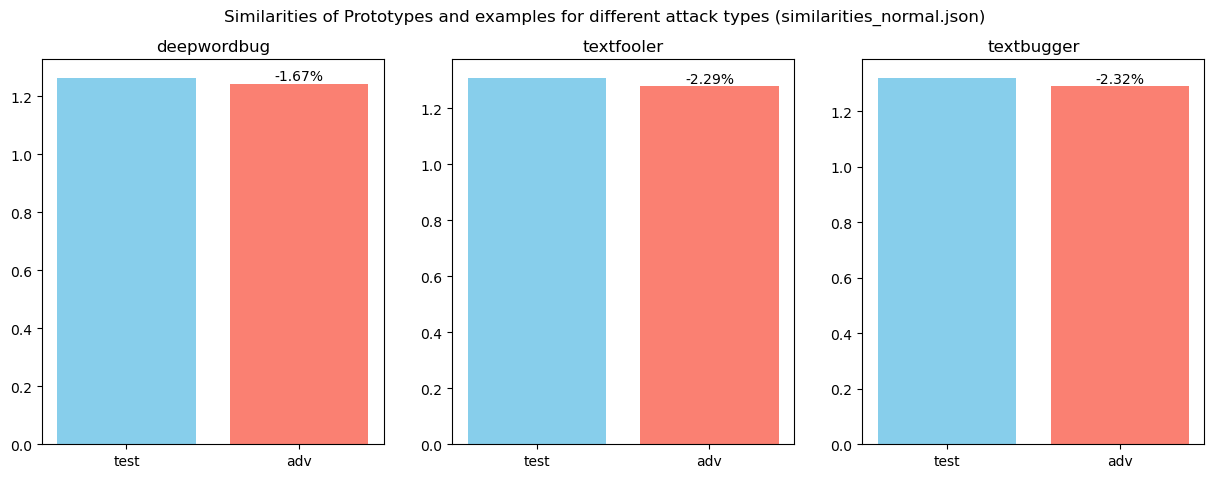

Number of indices to keep: 12


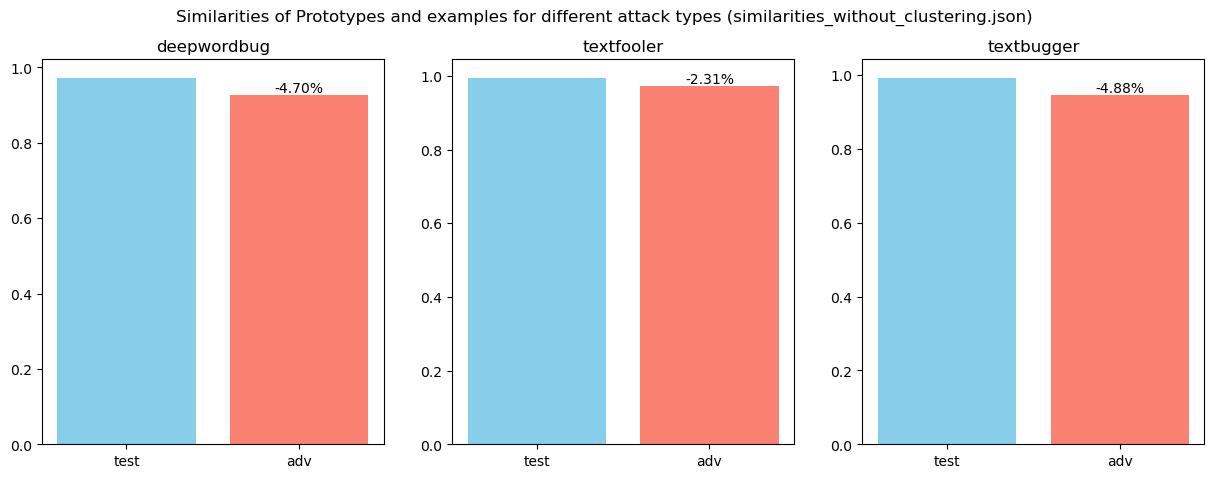

Number of indices to keep: 16


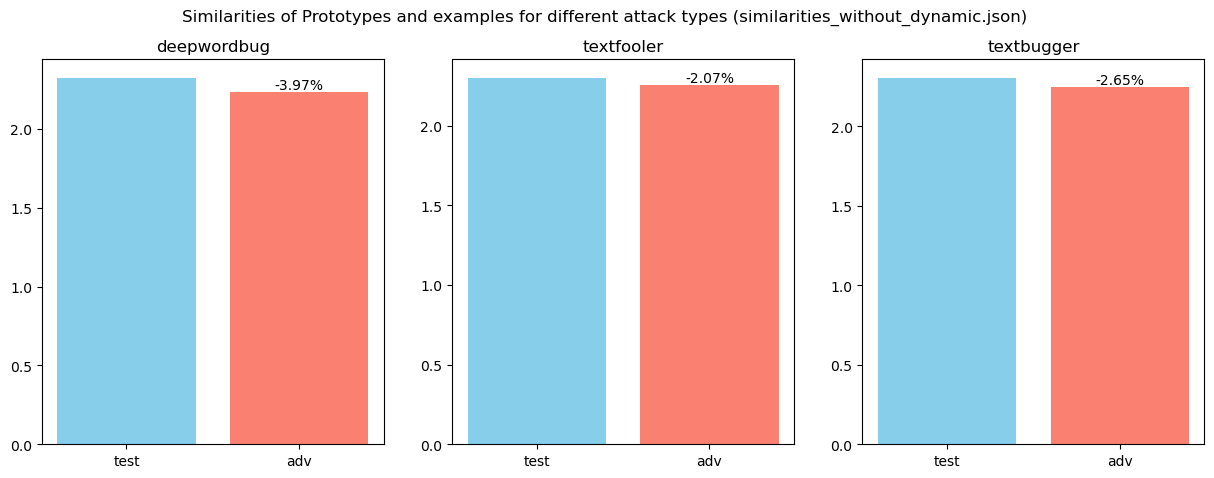

Number of indices to keep: 8


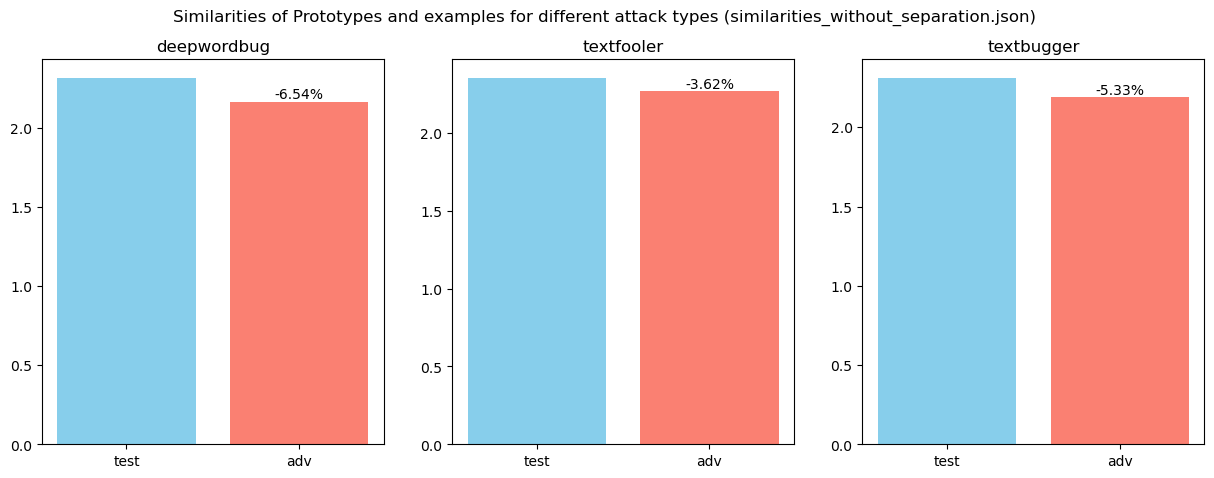

In [29]:
for file in [
    "similarities_normal.json",
    # "similarities_with_linear.json",
    "similarities_without_clustering.json",
    "similarities_without_dynamic.json",
    "similarities_without_separation.json",
]:
    with open(file) as f:
        similarities_normal = json.load(f)

    similarities = similarities_normal["similarities"]
    mask = similarities_normal["mask"]

    indices_to_keep = np.where(mask)[0]
    print("Number of indices to keep:", len(indices_to_keep))

    for key in similarities.keys():
        arr = np.array(similarities[key]).squeeze()
        arr = arr[:, indices_to_keep]
        similarities[key] = arr

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    for index, attack_type in enumerate(["deepwordbug", "textfooler", "textbugger"]):
        # draw both test_{attack_type} mean mean similarities and adv_{attack_type} mean mean similarities in one plot
        axs[index].bar(
            x=np.arange(1, 3),
            height=[
                similarities[f"test_{attack_type}"].mean(axis=1).mean(),
                similarities[f"adv_{attack_type}"].mean(axis=1).mean(),
            ],
            tick_label=["test", "adv"],
            color=["skyblue", "salmon"],
        )
        axs[index].set_title(f"{attack_type}")
        # set a text with the value difference between test and adv on adv bar in terms of percentage
        axs[index].text(
            2,
            similarities[f"adv_{attack_type}"].mean(axis=1).mean(),
            f"{(similarities[f'adv_{attack_type}'].mean(axis=1).mean() - similarities[f'test_{attack_type}'].mean(axis=1).mean()) / similarities[f'test_{attack_type}'].mean(axis=1).mean() * 100:.2f}%",
            ha="center",
            va="bottom",
            color="black",
        )

    # set the figure title
    fig.suptitle(
        f"Similarities of Prototypes and examples for different attack types ({file})"
    )
    plt.savefig(f"similarities_{file}.png")
    plt.show()